In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
X = np.random.rand(100, 4)
y = np.random.randint(0, 2, 100)

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

### LDA

In [3]:
print([attr for attr in dir(lda) if not attr.startswith('_')])

['classes_', 'coef_', 'covariance_', 'covariance_estimator', 'decision_function', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_metadata_routing', 'get_params', 'intercept_', 'means_', 'n_components', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'scalings_', 'score', 'set_output', 'set_params', 'set_score_request', 'shrinkage', 'solver', 'store_covariance', 'tol', 'transform', 'xbar_']


In [4]:
lda.means_

array([[0.45882834, 0.5186004 , 0.47612887, 0.54365283],
       [0.50270033, 0.46912692, 0.4599694 , 0.46801933]])

In [5]:
lda.covariance_

array([[ 0.06605023, -0.01831892, -0.00276359,  0.01003924],
       [-0.01831892,  0.07454565,  0.00103736,  0.00611375],
       [-0.00276359,  0.00103736,  0.0899708 , -0.00466817],
       [ 0.01003924,  0.00611375, -0.00466817,  0.07981689]])

In [6]:
X_test = np.random.rand(3, 4)
X_test

array([[0.07550457, 0.766343  , 0.92473753, 0.76423887],
       [0.3071127 , 0.63321527, 0.41138639, 0.80053992],
       [0.67819699, 0.98266077, 0.79878838, 0.25145667]])

In [7]:
lda.predict_proba(X_test)

array([[0.70166115, 0.29833885],
       [0.6402256 , 0.3597744 ],
       [0.49830243, 0.50169757]])

In [8]:
lda.coef_

array([[ 0.6834906 , -0.39793869, -0.20210801, -0.99594377]])

### QDA

In [9]:
print([attr for attr in dir(qda) if not attr.startswith('_')])

['classes_', 'covariance_', 'decision_function', 'fit', 'get_metadata_routing', 'get_params', 'means_', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'reg_param', 'rotations_', 'scalings_', 'score', 'set_params', 'set_score_request', 'store_covariance', 'tol']


In [10]:
qda.means_

array([[0.45882834, 0.5186004 , 0.47612887, 0.54365283],
       [0.50270033, 0.46912692, 0.4599694 , 0.46801933]])

In [11]:
qda.covariance_

[array([[ 0.06677963, -0.02314875, -0.00479378,  0.01239209],
        [-0.02314875,  0.0792137 ,  0.0085885 , -0.00281064],
        [-0.00479378,  0.0085885 ,  0.07677201,  0.00162762],
        [ 0.01239209, -0.00281064,  0.00162762,  0.08240623]]),
 array([[ 0.06809744, -0.01365559, -0.00058875,  0.00781598],
        [-0.01365559,  0.07250984, -0.0074536 ,  0.01646801],
        [-0.00058875, -0.0074536 ,  0.10880294, -0.01198812],
        [ 0.00781598,  0.01646801, -0.01198812,  0.08036011]])]

In [12]:
qda.predict_proba(X_test)

array([[0.72785146, 0.27214854],
       [0.64346553, 0.35653447],
       [0.60915685, 0.39084315]])

### REAL CASE

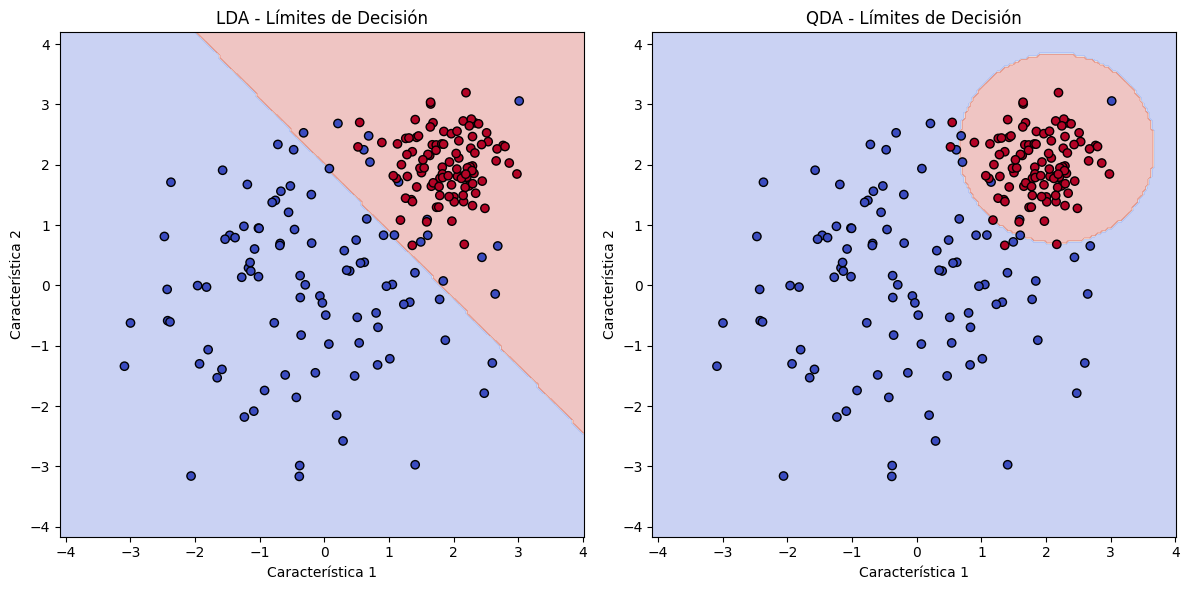

In [13]:
# Crear dos nubes de puntos
X1 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 2]], 100)
X2 = np.random.multivariate_normal([2, 2], [[0.3, 0], [0, 0.3]], 100)
X = np.vstack([X1, X2])

y = np.hstack([np.zeros(100), np.ones(100)])

# Entrenar modelos
lda.fit(X, y)
qda.fit(X, y)

# Crear cuadrícula de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicciones en la cuadrícula
lda_pred = lda.predict(grid).reshape(xx.shape)
qda_pred = qda.predict(grid).reshape(xx.shape)

# Graficar límites de decisión LDA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, lda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("LDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Graficar límites de decisión QDA
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, qda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("QDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()


In [14]:
lda.means_

array([[-0.14896146,  0.06148633],
       [ 1.8865777 ,  2.00020284]])

In [15]:
qda.means_

array([[-0.14896146,  0.06148633],
       [ 1.8865777 ,  2.00020284]])

In [16]:
lda.covariance_

array([[1.01368002, 0.06968055],
       [0.06968055, 1.05957942]])

In [29]:
x = np.array([[2, 2]])
y = np.array([[1, -1]])
m = np.array([[1, 0], [0, 1]])

In [31]:
x*m*y.T

array([[ 2,  0],
       [ 0, -2]])

In [32]:
y.T*m*x

array([[ 2,  0],
       [ 0, -2]])

In [17]:
qda.covariance_

[array([[1.81535293, 0.13939819],
        [0.13939819, 1.89069326]]),
 array([[0.2324855 , 0.0013706 ],
        [0.0013706 , 0.24987123]])]

Means are the same. Covariances are different: while LDA uses the same for both classes, QDA has a different one for each class. This allows more flexibility, drawing a quadratic decision function. This can also cause overfitting.

In [18]:
lda.coef_

array([[1.87193374, 1.68830381]])

coef_ is the weight vector, the direction that maximizes the separation between both classes. This could be important to calculate local and global contributions.

In [19]:
lda.priors_

array([0.5, 0.5])

In [20]:
lda.intercept_

array([-3.36673008])

In [21]:
lda.predict(np.array([[-2, -2]]))

array([0.])

In [22]:
X1 = np.array([2, 2])

X1, lda.coef_

(array([2, 2]), array([[1.87193374, 1.68830381]]))

In [23]:
lda.intercept_

array([-3.36673008])

In [24]:
qda.means_

array([[-0.14896146,  0.06148633],
       [ 1.8865777 ,  2.00020284]])

In [25]:
qda.covariance_

[array([[1.81535293, 0.13939819],
        [0.13939819, 1.89069326]]),
 array([[0.2324855 , 0.0013706 ],
        [0.0013706 , 0.24987123]])]

In [40]:
qda.predict_proba(np.array([[2, 2]]))

array([[0.01602506, 0.98397494]])